# Functions and numpy

## Functions

A function is a useful way of reusing code to do a common task over and over again without having to repeat yourself.
This makes it easier for you to write code and makes it simpler for others to read.

We can start with a really simple example – adding two numbers together.
For example, if we want to add two numbers together in Python we can type: 

In [1]:
a = 2
b = 3
c = a + b
print(c)

5


In practice we would never make something so straightforward into a function, but if we do want to make this into a function it would look like this:

In [2]:
def add(a,b):
    c = a + b
    return c

or just:

In [3]:
def add(a,b):
    return a + b

There are several elements to this. Firstly, the `def` indicates that you are defining a function, and the name of this function is `add`. 
Next, this function takes two inputs: `a` and `b`. This is what the function needs the user to put in to do its job.
Everything that comes after the colon is the operation that the function will do. Note that everything in the function after the colon is indented – this is important! Finally the part after the `return` is what the function returns when you call it.

We can call the function by typing:

In [4]:
c = add(5,6)
print(c)

11


### Exercise

We often measure greenhouse gases in the units mole of the substance per mole of air.
Sometimes it's useful to instead have the units in mass concentration, so mass of the substance per volume of air.

In Spyder, open a new Python script file and write the code to do the following in it:
1. Create a function that takes the concentration of a gas in the units $\text{mol/mol}$ and the molar mass of that gas and converts it into mass concentration in units $\text{g/m}^3$. Assume that the molar volume of air is $0.0224\,\text{m$^3$/mol}$.
2. Use this function to work out what the mass concentration of $1 \times 10^{-6}~\text{mol/mol}$ of methane ($\mathrm{CH_{4}}$) is in $\text{g/m}^3$

## Numpy

A collection of many function is called a module.
Luckily many useful modules already exist which perfom many of the tasks that we need to do.
One of the most useful modules is called *numpy* (**num**erical **Py**thon) – it contains many functions to deal with numerical programming.

To use the functions contained within `numpy` we first need to *import* it.

In [5]:
import numpy as np

The `as` statement gives us a shorthand to use in the code when we want to access numpy, in this case `np`.

To use the functions within numpy, e.g. the square root function, we can type:

In [6]:
np.sqrt(9.)

3.0

where we need the `np.` at the start of the function to tell python that it's contained within the numpy module.

Numpy is also useful as we can create something called an *array* and assign it to a variable. This is a collection of numbers similar to a vector.
For example we could create an array using:

In [7]:
arr = np.array([1.,1.,2.,3.,5.,8.])

We can then do the same to all elements of the array at once similar to with single numbers, e.g. to multiply all numbers in the array by two:

In [8]:
print(arr * 2)

[  2.   2.   4.   6.  10.  16.]


To access just one element of an array we just need to tell python where the element we're interested in is located. The first element in the array has the index 0, then 1, 2 etc etc.

For example, we can type

In [9]:
print(arr[2] * 2)

4.0


To access the first 3 elements of the array we can type

In [10]:
print(arr[0:3])

[ 1.  1.  2.]


That is all elements up to, but not including, the one with index 3. You'll get used to this sort of indexing system quite quickly.

Just like for scalar variables, we can also perform a function on an array, for example to find the sum of an array we can type

In [11]:
print(np.sum(arr))

20.0


We can also replace one number or multiple numbers in the array by

In [12]:
arr[0] = 0.
print(arr[0])

0.0


### Reading text and csv files with numpy

Numpy also has modules to do other useful tasks, such as reading text files.
The file "ch4_macehead_2014.csv" contains one year's worth of daily averaged methane concentration measured at the Mace Head site on the west coast of Ireland. You can open this up in a text editor to have a look.
The left column contains the dates and the right column contains the average concentration on that day (in the units $\text{mol/mol}$).

To read the file into an array you can do the following:

In [13]:
ch4array = np.genfromtxt('data/ch4_macehead_2014.csv', delimiter=',', skip_header=1)

The `genfromtxt` function generates and array from a text file. The `delimiter` argument says that the values in each column are separated by a ',' and `skip_header` tells numpy to ignore the first row and this is just the header information and not values to go into the array.

The variable called `ch4array` now contains all of the dates and concentrations in two columns. To use just part of the data in the array we need to access the correct columns and rows.

For example to print just the first ten days' of data we can type

In [1]:
print(ch4array[0:10,:])

NameError: name 'ch4array' is not defined

This tells python to print the first ten rown of data and the colon on its own means print all of the columns in that row.

But something is wrong here?! All of the dates have been replaced with `nan` (meaning 'not a number'). 
This is because numpy can only read numbers, whereas the first column in our file is formatted as a date.
There are other ways to read in data containing dates and or strings which you will learn about later.
For now we will just extract the measurements that we're interested and work with those.

If we want to print the entire column of concentrations we can type

In [2]:
print(ch4array[:,1])

NameError: name 'ch4array' is not defined

# Pandas

Pandas is a useful module for dealing with time series data. This section will guide you through the steps to read in timeseries data in csv format using Pandas, cut it down to the time period that you're interested in and to average the data into new chuncks. 

Like all modules we have to begin by importing it, using the shorthand pd to access the module,

In [21]:
import pandas as pd

Now we've imported the Pandas we can use one of its functions to read in a csv file.
The csv file we will read in contains two-hourly methane measurements at the Mace Head measurement station in Ireland, which is run by ACRG, in 2014. The keyword index_col="time" tells the function that the measurements are indexed by the column with the heading "time" and "parse_dates=True" tells it that that column contains times.

In [38]:
ch4data = pd.read_csv("data/ch4_macehead_2014.csv", index_col="time", parse_dates=True)

We can take a look at some of the data by printing it to the screen,  

In [39]:
ch4data

,mf
time,
2014-01-01 00:00:00,0.000002
2014-01-01 02:00:00,0.000002
2014-01-01 04:00:00,0.000002
2014-01-01 06:00:00,0.000002
2014-01-01 08:00:00,0.000002
...,...
2014-12-31 14:00:00,0.000002
2014-12-31 16:00:00,0.000002
2014-12-31 18:00:00,0.000002


where the variable "ch4data" is known as a DataFrame and contains both information about both the measurment times and the measured mole fraction in air (mf).
We can only see a small selection of the data when we print it to the screen so instead we will plot the data on a graph to look at the whole time series.
You can do this simply by first importing a plotting module followed by a simple plot function (there will be much more on customising your plots later!),

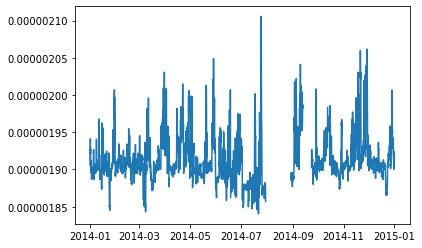

In [53]:
import matplotlib.pyplot as plt
plt.plot(ch4data)

Now we can visualise the entire year of methane emissions.
What if we only want to work with a subset of the data, say one month?
To do this we can cut the data down using some of Panda's inbuilt functionality.
For example, to select the month of May we can type,

In [54]:
maych4data = ch4data.loc["2014-05-01":"2014-06-01"]

which slices the timeseries to the period defined within the slice.
Again, we can print this data to the screen,

In [55]:
maych4data

,mf
time,
2014-05-01 00:00:00,0.000002
2014-05-01 02:00:00,0.000002
2014-05-01 04:00:00,0.000002
2014-05-01 06:00:00,0.000002
2014-05-01 08:00:00,0.000002
...,...
2014-06-01 14:00:00,0.000002
2014-06-01 16:00:00,0.000002
2014-06-01 18:00:00,0.000002


or plot it using,

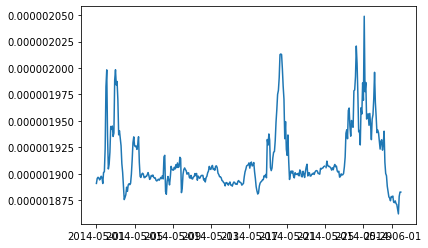

In [56]:
plt.plot(maych4data)

If we're not interested in two-hourly data and instead just want to look at something like the monthly means, we can resample the data to this period.
This is done using the command

In [57]:
ch4monthlymean = ch4data.resample("MS").mean()

By passing "MS" to the resample function, we are telling pandas that we want to sample each month of the data and set the index to the start of the month (MS is short for month-start).
This time we can print the whole resampled timeseries to the screen.

In [58]:
ch4monthlymean

,mf
time,
2014-01-01,0.000002
2014-02-01,0.000002
2014-03-01,0.000002
2014-04-01,0.000002
2014-05-01,0.000002
2014-06-01,0.000002
2014-07-01,0.000002
2014-08-01,0.000002
2014-09-01,0.000002


Finally, we can take a look at this data on a plot.

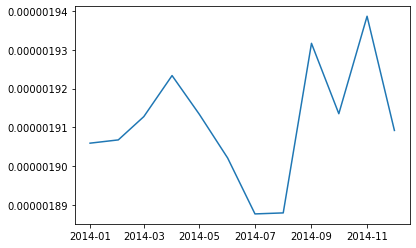

In [52]:
plt.plot(ch4monthlymean)

# Exercise

In Spyder, open a new Python script file and write the code to do the following in it:
 1. Read "ch4_capegrim_2012-2016.csv" from within the "data" directory as a numpy array. This contains **monthly** methane concentrations from Cape Grim in Australia from 2012 - 2016. *Hint: You may want to look the file first to see what options from the above example you need to update.*
 2. Find the mean and standard deviation of the measured concentration of methane for 2012 in $\text g/m^3$.

## Next Topic

When ready you can move onto the next topic:

### [Xarray and netCDF files](xarray.ipynb)

To view the introduction page containing the list of topics click [here](introduction.ipynb)